In [6]:
!pip install numpy pandas matplotlib

In [0]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
  
# Import supplementary visualizations code visuals.py
import visuals as vs

In [15]:
# Pretty display for notebooks
%matplotlib inline

# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data[:100])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


**Survived:** Outcome of survival (0 = No; 1 = Yes)

**Pclass:** Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)

**Name**: Name of passenger

**Sex:** Sex of the passenger

**Age**: Age of the passenger (Some entries contain NaN)

**SibSp**: Number of siblings and spouses of the passenger aboard

**Parch**: Number of parents and children of the passenger aboard

**Ticket**: Ticket number of the passenger

**Fare**: Fare paid by the passenger

**Cabin** Cabin number of the passenger (Some entries contain NaN)

**Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

In [9]:
# Quantidade de registros no csv
len(full_data)

891

In [10]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
print(accuracy_score(outcomes[:5], predictions))

Predictions have an accuracy of 60.00%.


In [0]:
print(predictions)

0    1
1    1
2    1
3    1
4    1
dtype: int64


In [0]:
print(outcomes[:5])

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


# **Vamos criar uma função que supõe que todos os passageiros morreram no naufrágio. Uma vez que mais que 50% morreram, qual será a acurácia desse modelo?**

In [0]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the array of predictions
predictions = predictions_0(data)

In [0]:
print(accuracy_score(outcomes, predictions))


Predictions have an accuracy of 61.62%.


**Ou seja, dado um estranho qualquer que estava no titanic a chance dele ter morrido foi de 61,62% com base no nosso modelo e predições (o vetor de 0 )**

# **Uma vez que a maioria de mulheres sobreviveram ao naufrágio em relação aos homens, vamos criar uma hipótese pelo algoritmo e gerar um array de predições de que se for mulher vai sobreviver (1) e se for homem vai morrer (0)**

In [0]:

def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if(passenger['Sex'] == 'male'):
          predictions.append(0)
        else:
          predictions.append(1)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)


In [0]:

print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 78.68%.


Using just the Sex feature for each passenger, we are able to increase the accuracy of our predictions by a significant margin. Now, let's consider using an additional feature to see if we can further improve our predictions. For example, consider all of the male passengers aboard the RMS Titanic: Can we find a subset of those passengers that had a higher rate of survival? Let's start by looking at the Age of each male, by again using the survival_stats function. This time, we'll use a fourth parameter to filter out the data so that only passengers with the Sex 'male' will be included.
Run the code cell below to plot the survival outcomes of male passengers based on their age.

# **Analisando os dados podemos perceber que outro fator que PODE ter influenciado na sobrevivência ou não de um passageiro qualquer, é a idade quando ele é homem. Passageiros com idade menor ou igual a 10 parecem ter mais chances de sobreviver. Com base nessa hipótese iremos refinar mais uma vez nosso modelo e verificar sua acurácia.**

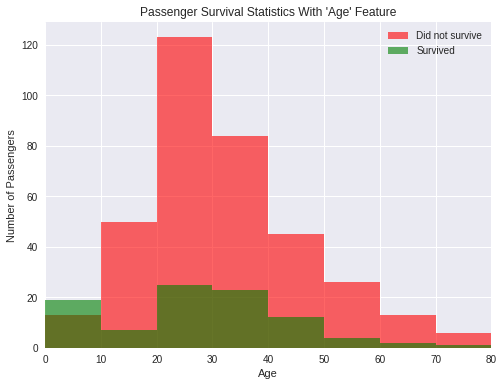

In [13]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])


In [0]:

def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
      
      if(passenger['Sex'] == 'male'):
        if(passenger['Age'] <= 10):
          predictions.append(1)
        else:
          predictions.append(0)
      else:
        predictions.append(1)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)


In [0]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 79.24%.
